<a href="https://colab.research.google.com/github/arceda/ARGOS-MOL-PAPER/blob/main/tasi/1_DCC_IA_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obteniendo los datos originales del experimento de Galton.

In [ ]:
import csv
import requests # pip install requests for easy http request for CSV data
import pandas as pd
import numpy as np

import io

url = "https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv"

s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Convirtiendo las estaturas, de pulgadas a centímetros

inch_to_cm = 2.54
df['father'] *= inch_to_cm
#df['father'] = df['father'] * inch_to_cm

df['mother'] *= inch_to_cm
df['childHeight'] *= inch_to_cm
df['midparentHeight'] *= inch_to_cm
print(df)



    family  father  mother  ...  childNum  gender  childHeight
0        1  199.39  170.18  ...         1    male      185.928
1        1  199.39  170.18  ...         2  female      175.768
2        1  199.39  170.18  ...         3  female      175.260
3        1  199.39  170.18  ...         4  female      175.260
4        2  191.77  168.91  ...         1    male      186.690
..     ...     ...     ...  ...       ...     ...          ...
929    203  157.48  167.64  ...         1    male      162.560
930    203  157.48  167.64  ...         2  female      157.480
931    203  157.48  167.64  ...         3  female      154.940
932    204  158.75  160.02  ...         1    male      168.910
933    204  158.75  160.02  ...         2  female      144.780

[934 rows x 8 columns]


In [ ]:
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,199.39,170.18,191.5922,4,1,male,185.928
1,1,199.39,170.18,191.5922,4,2,female,175.768
2,1,199.39,170.18,191.5922,4,3,female,175.260
3,1,199.39,170.18,191.5922,4,4,female,175.260
4,2,191.77,168.91,187.0964,4,1,male,186.690
...,...,...,...,...,...,...,...,...
929,203,157.48,167.64,169.2656,3,1,male,162.560
930,203,157.48,167.64,169.2656,3,2,female,157.480
931,203,157.48,167.64,169.2656,3,3,female,154.940
932,204,158.75,160.02,165.7858,2,1,male,168.910


# Ejercicios:
Explorar el conjunto de datos
1. Imprimir el DataFrame df
2. Imprimir los tipos de datos de las columnas
3. Graficar un histograma de las columnas _father_, _mother_ y _childHeight_
4. Hacer un scatter plot de las columnas _father_ vs. _childHeight_ y _mother_ vs. _childHeight_
5. Mostrar los valores mínimo, máximo y medio para las columnas _father_, _mother_ y _childHeight_.

    family  father  mother  ...  childNum  gender  childHeight
0        1  199.39  170.18  ...         1    male      185.928
1        1  199.39  170.18  ...         2  female      175.768
2        1  199.39  170.18  ...         3  female      175.260
3        1  199.39  170.18  ...         4  female      175.260
4        2  191.77  168.91  ...         1    male      186.690
..     ...     ...     ...  ...       ...     ...          ...
929    203  157.48  167.64  ...         1    male      162.560
930    203  157.48  167.64  ...         2  female      157.480
931    203  157.48  167.64  ...         3  female      154.940
932    204  158.75  160.02  ...         1    male      168.910
933    204  158.75  160.02  ...         2  female      144.780

[934 rows x 8 columns]
family              object
father             float64
mother             float64
midparentHeight    float64
children             int64
childNum             int64
gender              object
childHeight        float64
dtyp

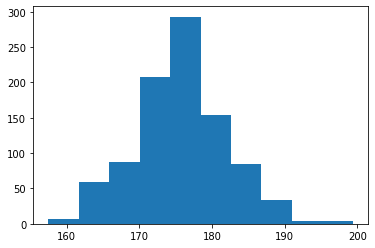

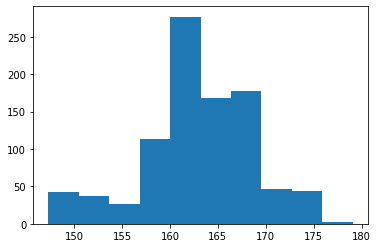

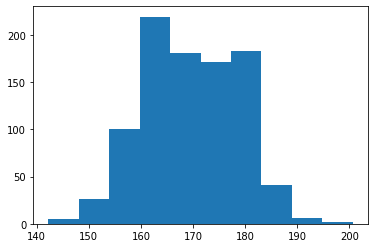

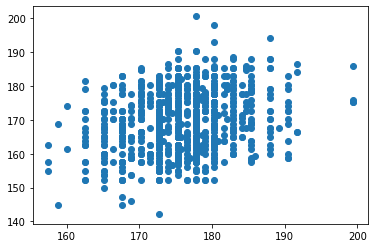

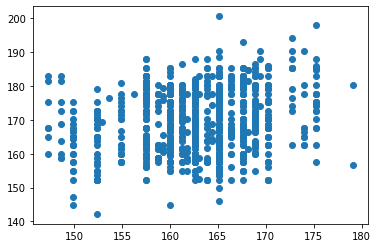

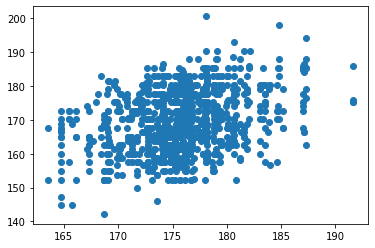

min  (father) = 157.480000
max  (father) = 199.390000
mean (father) = 175.760657

min  (mother) = 147.320000
max  (mother) = 179.070000
mean (mother) = 162.786805

min  (childHeight) = 142.240000
max  (childHeight) = 200.660000
mean (childHeight) = 169.534666



In [ ]:
#1
print(df)

#2
print(df.dtypes)

#3
import matplotlib
import matplotlib.pyplot as plt
 
plt.hist(df['father'])
plt.show()

plt.hist(df['mother'])
plt.show()

plt.hist(df['childHeight'])
plt.show()

#4
plt.scatter(df['father'], df['childHeight'])
plt.show()

plt.scatter(df['mother'], df['childHeight'])
plt.show()

plt.scatter(df['midparentHeight'], df['childHeight'])
plt.show()

#5
for col in ['father', 'mother', 'childHeight']:
  print("min  (%s) = %f" %   (col, df[col].min()))
  print("max  (%s) = %f" %   (col, df[col].max()))
  print("mean (%s) = %f\n" % (col, df[col].mean()))

Usando solamente los datos de los hijos varones

In [ ]:
df[df['gender'] == 'male']

0       True
1      False
2      False
3      False
4       True
       ...  
929     True
930    False
931    False
932     True
933    False
Name: gender, Length: 934, dtype: bool

In [ ]:
#df = df[df['gender'] == 'male']
#df

df = df[df['gender'] == 'male']
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,199.39,170.18,191.5922,4,1,male,185.928
4,2,191.77,168.91,187.0964,4,1,male,186.690
5,2,191.77,168.91,187.0964,4,2,male,184.150
8,3,190.50,162.56,183.0324,2,1,male,180.340
10,4,190.50,162.56,183.0324,5,1,male,179.070
...,...,...,...,...,...,...,...,...
918,199,162.56,162.56,169.0624,7,2,male,172.720
924,200,162.56,160.02,167.6908,1,1,male,163.830
925,201,162.56,152.40,163.5760,2,1,male,167.640
929,203,157.48,167.64,169.2656,3,1,male,162.560


In [ ]:
x1 = df['father']

X1 = df[['father']]
y  = pd.Series(df['childHeight'])

print("Number of Rows: ", len(df))
print("x1 shape: ", x1.shape)
print("X1 shape: ", X1.shape)

print("y shape: ", y.shape)



Number of Rows:  481
x1 shape:  (481,)
X1 shape:  (481, 1)
y shape:  (481,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(X1, y) # X1 is row/col fmt, y is vector

print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# y = a + bx

Coefficient: 
 [0.4465226]
Intercept: 
 97.4409558222927


In [ ]:
y = 97.4409558222927 + 0.4465226*160
y

168.88457182229268

**Efecto de fit_intercept en la regresión lineal**

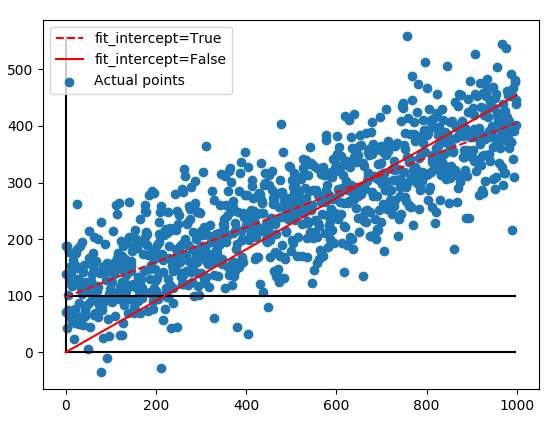

# Predicción
Utilizando el modelo para predecir valores para un _x_ dado:


In [ ]:
ypred = model.predict([[160]])
print(ypred)

#[0.4465226]
#Intercept: 
# 97.4409558222927
#y = a + bx
#y = 97.4409558222927 + 0.4465226*(160)
#print(y)

[168.88457257]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


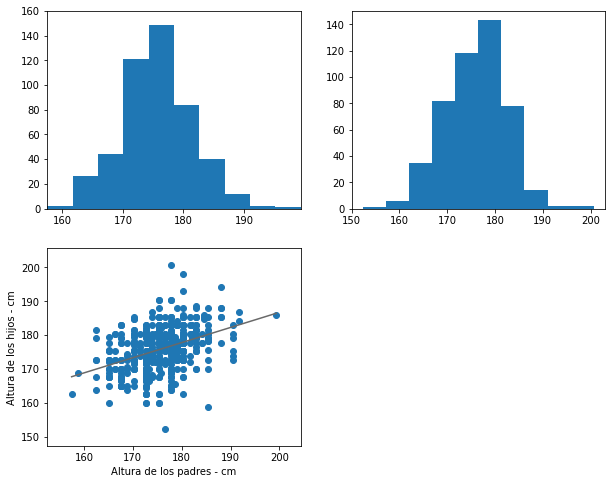

In [ ]:
xpred = np.linspace(x1.min(), x1.max()) 
Xpred = xpred[:, np.newaxis] 

ypred = model.predict(Xpred)

import matplotlib
import matplotlib.pyplot as plt
 
plt.figure(1, (10,8)) 
 
# Histograma de la altura de los padres
plt.subplot(2,2,1)
plt.hist(x1)
plt.axis([x1.min(),x1.max(),0,160])
 
# Scatter plot with line-fit
plt.subplot(2,2,3)
plt.scatter(x1,y)
plt.plot(Xpred,ypred, color="dimgrey")
plt.axis([x1.min()-5, x1.max()+5, y.min()-5, y.max()+5])
plt.xlabel("Altura de los padres - cm")
plt.ylabel("Altura de los hijos - cm")
 
# Histograma de las estaturas de los hijos
plt.subplot(2,2,2)
plt.hist(y,orientation='vertical')
 
plt.show()


In [ ]:
print(y.mean())
print(y.min())
print(y.max())

175.8546029106027
152.4
200.66


# Ejercicio

Realizar la regresión lineal utilizando como variables predictoras 
- la estatura de la madre
- la media entre la estatura de padre y madre

Calcular la estatura de las hijas.